#Descargar Dataset Flickr8k

El dataset que se va a utilizar contiene 8092 fotografías y sus correspondientes descripciones. Así mismo, dicho dataset se encuentra dividido en 6000 imágenes para training, 1000 para validación y 1000 para test.
Para realizar la práctica se realizará a través de una arquitectura de red neuronal que nos permita extraer las features de las fotos que le pongamos. La  arquitectura seleccionada es VGG preentrenada con el dataset ImageNet.

In [2]:
!wget http://nlp.cs.illinois.edu/HockenmaierGroup/Framing_Image_Description/Flickr8k_text.zip
!unzip -o Flickr8k_text.zip

--2018-07-01 17:09:04--  http://nlp.cs.illinois.edu/HockenmaierGroup/Framing_Image_Description/Flickr8k_text.zip
Resolving nlp.cs.illinois.edu (nlp.cs.illinois.edu)... 192.17.58.132
Connecting to nlp.cs.illinois.edu (nlp.cs.illinois.edu)|192.17.58.132|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2340801 (2.2M) [application/zip]
Saving to: ‘Flickr8k_text.zip’

Flickr8k_text.zip   100%[===================>]   2.23M  4.65MB/s    in 0.5s    

2018-07-01 17:09:05 (4.65 MB/s) - ‘Flickr8k_text.zip’ saved [2340801/2340801]

Archive:  Flickr8k_text.zip
  inflating: CrowdFlowerAnnotations.txt  
  inflating: ExpertAnnotations.txt   
  inflating: Flickr8k.lemma.token.txt  
   creating: __MACOSX/
  inflating: __MACOSX/._Flickr8k.lemma.token.txt  
  inflating: Flickr8k.token.txt      
  inflating: Flickr_8k.devImages.txt  
  inflating: Flickr_8k.testImages.txt  
  inflating: Flickr_8k.trainImages.txt  
  inflating: readme.txt              


In [3]:
!wget http://nlp.cs.illinois.edu/HockenmaierGroup/Framing_Image_Description/Flickr8k_Dataset.zip
!unzip -q Flickr8k_Dataset.zip

--2018-07-01 17:09:15--  http://nlp.cs.illinois.edu/HockenmaierGroup/Framing_Image_Description/Flickr8k_Dataset.zip
Resolving nlp.cs.illinois.edu (nlp.cs.illinois.edu)... 192.17.58.132
Connecting to nlp.cs.illinois.edu (nlp.cs.illinois.edu)|192.17.58.132|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115419746 (1.0G) [application/zip]
Saving to: ‘Flickr8k_Dataset.zip’

Flickr8k_Dataset.zi 100%[===================>]   1.04G  82.5MB/s    in 13s     

2018-07-01 17:09:28 (78.9 MB/s) - ‘Flickr8k_Dataset.zip’ saved [1115419746/1115419746]



#Instalar libreria

In [4]:
!pip install tqdm

    100% |████████████████████████████████| 51kB 1.7MB/s 


In [5]:
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

Selecting previously unselected package fontconfig.
(Reading database ... 18396 files and directories currently installed.)
Preparing to unpack .../00-fontconfig_2.11.94-0ubuntu2_amd64.deb ...
Unpacking fontconfig (2.11.94-0ubuntu2) ...
Selecting previously unselected package libjbig0:amd64.
Preparing to unpack .../01-libjbig0_2.1-3.1_amd64.deb ...
Unpacking libjbig0:amd64 (2.1-3.1) ...
Selecting previously unselected package libcdt5.
Preparing to unpack .../02-libcdt5_2.38.0-16ubuntu2_amd64.deb ...
Unpacking libcdt5 (2.38.0-16ubuntu2) ...
Selecting previously unselected package libcgraph6.
Preparing to unpack .../03-libcgraph6_2.38.0-16ubuntu2_amd64.deb ...
Unpacking libcgraph6 (2.38.0-16ubuntu2) ...
Selecting previously unselected package libtiff5:amd64.
Preparing to unpack .../04-libtiff5_4.0.8-5ubuntu0.1_amd64.deb ...
Unpacking libtiff5:amd64 (4.0.8-5ubuntu0.1) ...
Selecting previously unselected package libwebp6:amd64.
Preparing to unpack .../05-libwebp6_0.6.0-3_amd64.deb ...
Unpa

Setting up libgraphite2-3:amd64 (1.3.10-2) ...
Setting up libpixman-1-0:amd64 (0.34.0-1) ...
Processing triggers for libc-bin (2.26-0ubuntu2.1) ...
Setting up libltdl7:amd64 (2.4.6-2) ...
Setting up libxcb-shm0:amd64 (1.12-1ubuntu1) ...
Setting up libxpm4:amd64 (1:3.5.12-1) ...
Setting up libxt6:amd64 (1:1.1.5-1) ...
Setting up libthai-data (0.1.26-3) ...
Setting up libcdt5 (2.38.0-16ubuntu2) ...
Setting up fontconfig (2.11.94-0ubuntu2) ...
Regenerating fonts cache... done.
Setting up libcgraph6 (2.38.0-16ubuntu2) ...
Setting up libwebp6:amd64 (0.6.0-3) ...
Setting up libcairo2:amd64 (1.14.10-1ubuntu1) ...
Setting up libgvpr2 (2.38.0-16ubuntu2) ...
Setting up libgd3:amd64 (2.2.5-3) ...
Setting up libharfbuzz0b:amd64 (1.4.2-1) ...
Setting up libthai0:amd64 (0.1.26-3) ...
Setting up libxmu6:amd64 (2:1.1.2-2) ...
Setting up libpango-1.0-0:amd64 (1.40.12-1) ...
Setting up libxaw7:amd64 (2:1.0.13-1) ...
Setting up libpangoft2-1.0-0:amd64 (1.40.12-1) ...
Setting up libpangocairo-1.0-0:amd64 

#Importar librerias

In [6]:
from os import listdir
from pickle import load, dump
from tqdm import tqdm
from numpy import array
from numpy import argmax
from pandas import DataFrame
from nltk.translate.bleu_score import corpus_bleu
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras.layers import Input, Dense, Flatten, LSTM, RepeatVector, TimeDistributed, Embedding
from keras.layers.merge import concatenate
from keras.layers.pooling import GlobalMaxPooling2D
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


#Mejorar gestión de la memoria

In [0]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
                                    # (nothing gets printed in Jupyter, only if you run it standalone)
config.gpu_options.per_process_gpu_memory_fraction = 0.95
config.gpu_options.visible_device_list = "0"

set_session(tf.Session(config=config))  # set this TensorFlow session as the default session for Keras

El dataset con el que vamos a trabajar contiene 5 descripciones para cada una de las fotografías. Lo que tenemos que hacer es una limplieza de dichas descripciones: convertir a minúscula, quitar puntuación, números, etc.

#Preparar texto

In [0]:
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text
 
filename = 'Flickr8k.token.txt'
# load descriptions
doc = load_doc(filename)

In [9]:
# extract descriptions for images
def load_descriptions(doc):
	mapping = dict()
	# process lines
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		if len(line) < 2:
			continue
		# take the first token as the image id, the rest as the description
		image_id, image_desc = tokens[0], tokens[1:]
		# remove filename from image id
		image_id = image_id.split('.')[0]
		# convert description tokens back to string
		image_desc = ' '.join(image_desc)
		# store the first description for each image
		if image_id not in mapping:
			mapping[image_id] = image_desc
	return mapping
 
# parse descriptions
descriptions = load_descriptions(doc)
print('Loaded: %d ' % len(descriptions))

Loaded: 8092 


In [10]:
import string

def clean_descriptions(descriptions):
	# prepare translation table for removing punctuation
	table = str.maketrans('', '', string.punctuation)
	for key, desc in descriptions.items():
		# tokenize
		desc = desc.split()
		# convert to lower case
		desc = [word.lower() for word in desc]
		# remove punctuation from each token
		desc = [w.translate(table) for w in desc]
		# remove hanging 's' and 'a'
		desc = [word for word in desc if len(word)>1]
		# store as string
		descriptions[key] =  ' '.join(desc)

# clean descriptions
clean_descriptions(descriptions)
# summarize vocabulary
all_tokens = ' '.join(descriptions.values()).split()
vocabulary = set(all_tokens)
print('Vocabulary Size: %d' % len(vocabulary))

Vocabulary Size: 4484


A continuación se mostrarán las palabras que más aparecen en las descripciones, ordenadas por número de veces

In [11]:
# Initializing Dictionary
d = {}

# counting number of times each word comes up in list of words (in dictionary)
for word in all_tokens: 
    d[word] = d.get(word, 0) + 1
word_freq = []

for key, value in d.items():
    word_freq.append((value, key))
    
word_freq.sort(reverse=True) 
print(word_freq)   

[(4092, 'in'), (2931, 'the'), (2074, 'on'), (2074, 'and'), (1986, 'is'), (1904, 'dog'), (1655, 'of'), (1531, 'man'), (1309, 'with'), (1057, 'black'), (1001, 'boy'), (867, 'white'), (846, 'girl'), (785, 'brown'), (676, 'are'), (622, 'to'), (603, 'at'), (587, 'two'), (543, 'water'), (533, 'red'), (525, 'his'), (511, 'an'), (492, 'woman'), (480, 'wearing'), (478, 'while'), (476, 'blue'), (461, 'people'), (460, 'group'), (419, 'shirt'), (386, 'running'), (386, 'playing'), (381, 'standing'), (374, 'through'), (366, 'ball'), (359, 'down'), (332, 'child'), (331, 'jumping'), (294, 'another'), (288, 'front'), (287, 'over'), (287, 'grass'), (281, 'snow'), (275, 'dogs'), (266, 'by'), (263, 'holding'), (258, 'little'), (257, 'green'), (256, 'sitting'), (247, 'field'), (241, 'up'), (238, 'yellow'), (237, 'walking'), (224, 'her'), (218, 'beach'), (209, 'into'), (206, 'from'), (201, 'large'), (200, 'person'), (199, 'children'), (199, 'air'), (195, 'mouth'), (193, 'player'), (193, 'for'), (185, 'pink'

In [0]:
# convert the loaded descriptions into a vocabulary of words
def to_vocabulary(descriptions):
	# build a list of all description strings
	all_desc = set()
	for key in descriptions.keys():
		[all_desc.update(d.split()) for d in descriptions[key]]
	return all_desc

In [13]:
# save descriptions to file, one per line
def save_doc(descriptions, filename):
	lines = list()
	for key, desc in descriptions.items():
		lines.append(key + ' ' + desc)
	data = '\n'.join(lines)
	file = open(filename, 'w')
	file.write(data)
	file.close()

descriptions = load_descriptions(doc)
print('Loaded: %d ' % len(descriptions))


print('Vocabulary Size: %d' % len(vocabulary))
  
# save descriptions
save_doc(descriptions, 'descriptions.txt')

Loaded: 8092 
Vocabulary Size: 4484


In [16]:
type(descriptions)

dict

In [0]:
descriptions.keys()

dict_keys(['1000268201_693b08cb0e', '1001773457_577c3a7d70', '1002674143_1b742ab4b8', '1003163366_44323f5815', '1007129816_e794419615', '1007320043_627395c3d8', '1009434119_febe49276a', '1012212859_01547e3f17', '1015118661_980735411b', '1015584366_dfcec3c85a', '101654506_8eb26cfb60', '101669240_b2d3e7f17b', '1016887272_03199f49c4', '1019077836_6fc9b15408', '1019604187_d087bf9a5f', '1020651753_06077ec457', '1022454332_6af2c1449a', '1022454428_b6b660a67b', '1022975728_75515238d8', '102351840_323e3de834', '1024138940_f1fefbdce1', '102455176_5f8ead62d5', '1026685415_0431cbf574', '1028205764_7e8df9a2ea', '1030985833_b0902ea560', '103106960_e8a41d64f8', '103195344_5d2dc613a3', '103205630_682ca7285b', '1032122270_ea6f0beedb', '1032460886_4a598ed535', '1034276567_49bb87c51c', '104136873_5b5d41be75', '1042020065_fb3d3ba5ba', '1042590306_95dea0916c', '1045521051_108ebc19be', '1048710776_bb5b0a5c7c', '1052358063_eae6744153', '105342180_4d4a40b47f', '1053804096_ad278b25f1', '1055623002_8195a43714'

In [0]:
descriptions.values()

dict_values(['A child in a pink dress is climbing up a set of stairs in an entry way .', 'A black dog and a spotted dog are fighting', 'A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .', 'A man lays on a bench while his dog sits by him .', 'A man in an orange hat starring at something .', 'A child playing on a rope net .', 'A black and white dog is running in a grassy garden surrounded by a white fence .', 'A dog shakes its head near the shore , a red ball next to it .', 'A boy smiles in front of a stony wall in a city .', 'A black dog leaps over a log .', 'A brown and white dog is running through the snow .', 'A man in a hat is displaying pictures next to a skier in a blue hat .', 'A collage of one person climbing a cliff .', 'A brown dog chases the water from a sprinkler on a lawn .', 'A dog prepares to catch a thrown object in a field with nearby cars .', 'a black and white dog jumping in the air to get a toy .', 'A child and a woman are a

El modelo base con el que se va empezar es que consta como fuente de la práctica, y a partir de aquí se mejorarán todos los parámetros necesarios de la arquitectura para poder mejorar los resultados y conseguir una arquitectura más fiable y robusta.

#Desarrollo modelo Deep Learning: BaseLine1

Para interpretar el contenido de las fotos vamos a utilizar un modelo preentrenado para clasificación de imágenes al que le extraeremos la última capa para obtener las features de las fotos de nuestro dataset. Keras que es el framework de alto nivel que vamos a utilizar nos permite hacer esto, por lo que a continuación le indicaremos a Keras donde están las fotos de entrenamiento, para que prepare las mismas para VGG y nos de las features predecidas para cada una de las mismas. El resultado será un diccionario con 4096 features para cada una de las imágenes que guardará en el archivo features.pkl

#Extraer features

In [14]:
from os import listdir
from os import path
from pickle import dump
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

# extract features from each photo in the directory
def extract_features(directory):
	# load the model
	model = VGG16()
	# re-structure the model
	model.layers.pop()
	model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
	# summarize
	model.summary()
	# extract features from each photo
	features = dict()
	for name in listdir(directory):
		# load an image from file
		filename = path.join(directory, name)
		image = load_img(filename, target_size=(224, 224))
		# convert the image pixels to a numpy array
		image = img_to_array(image)
		# reshape data for the model
		image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
		# prepare the image for the VGG model
		image = preprocess_input(image)
		# get features
		feature = model.predict(image, verbose=0)
		# get image id
		image_id = name.split('.')[0]
		# store feature
		features[image_id] = feature
		#print('>%s' % name)
	return features

# extract features from all images
directory = 'Flicker8k_Dataset'
features = extract_features(directory)
print('Extracted Features: %d' % len(features))
# save to file
dump(features, open('features.pkl', 'wb'))

553467904/553467096 [==============================] - 6s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_po

##Cargar Datos

Cargamos lo que hemos preparado para texto(descriptions.txt) y las features, de la parte de training. El modelo que se desarrollará generará una descripción de la foto que se le pase, pero dichas descripción será generada palabra a palabra. Para saber cuando empieza una descripción o termina utilizaremos los strings "startseq" y "endseq".

In [28]:
from pickle import load

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

# load photo features
def load_photo_features(filename, dataset):
	# load all features
	all_features = load(open(filename, 'rb'))
	# filter features
	features = {k: all_features[k] for k in dataset}
	return features

# load training dataset (6K)
filename = 'Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# photo features
train_features = load_photo_features('features.pkl', train)
print('Photos: train=%d' % len(train_features))

Dataset: 6000
Descriptions: train=6000
Photos: train=6000


##Entrenar modelo

La descripción se tendrá que codificar en números para poder ser utilizada como un input del modelo y también para poder realizar comparaciones entre las diferentes predicciones que se realizarán de las mismas. Para poder codificar el texto, Keras nos facilita la función Tokenizer. De esta forma el modelo recibirá una palabra y generará la siguiente. Después el input del modelo serán estas dos palabras generadas para generar la siguiente. Por lo que cada descripción de cada foto será una secuencia de palabras. Después se utlizará una función que creará la secuencia propiamente dicha.

In [29]:
from numpy import array
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

# load photo features
def load_photo_features(filename, dataset):
	# load all features
	all_features = load(open(filename, 'rb'))
	# filter features
	features = {k: all_features[k] for k in dataset}
	return features

# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# calculate the length of the description with the most words
def max_length(descriptions):
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)

# create sequences of images, input sequences and output words for an image
def create_sequences(tokenizer, max_length, descriptions, photos):
	X1, X2, y = list(), list(), list()
	# walk through each image identifier
	for key, desc_list in descriptions.items():
		# walk through each description for the image
		for desc in desc_list:
			# encode the sequence
			seq = tokenizer.texts_to_sequences([desc])[0]
			# split one sequence into multiple X,y pairs
			for i in range(1, len(seq)):
				# split into input and output pair
				in_seq, out_seq = seq[:i], seq[i]
				# pad input sequence
				in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
				# encode output sequence
				out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
				# store
				X1.append(photos[key][0])
				X2.append(in_seq)
				y.append(out_seq)
	return array(X1), array(X2), array(y)

# define the captioning model
def define_model(vocab_size, max_length):
	# feature extractor (encoder)
	inputs1 = Input(shape=(4096,))
	fe2 = Dense(128, activation='relu')(inputs1)
	fe3 = RepeatVector(max_length)(fe2)
	# embedding
	inputs2 = Input(shape=(max_length,))
	emb2 = Embedding(vocab_size, 50, mask_zero=True)(inputs2)
	emb3 = LSTM(256, return_sequences=True)(emb2)
	emb4 = TimeDistributed(Dense(128, activation='relu'))(emb3)
	# merge inputs
	merged = concatenate([fe3, emb4])
	# language model (decoder)
	lm2 = LSTM(500)(merged)
	lm3 = Dense(500, activation='relu')(lm2)
	outputs = Dense(vocab_size, activation='softmax')(lm3)
	# tie it together [image, seq] [word]
	model = Model(inputs=[inputs1, inputs2], outputs=outputs)
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	print(model.summary())
	return model

# load training dataset (6K)
filename = 'Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# photo features
train_features = load_photo_features('features.pkl', train)
print('Photos: train=%d' % len(train_features))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)
# prepare sequences
X1train, X2train, ytrain = create_sequences(tokenizer, max_length, train_descriptions, train_features)

# load test set
filename = 'Flickr_8k.devImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))
# descriptions
test_descriptions = load_clean_descriptions('descriptions.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
# photo features
test_features = load_photo_features('features.pkl', test)
print('Photos: test=%d' % len(test_features))
# prepare sequences
X1test, X2test, ytest = create_sequences(tokenizer, max_length, test_descriptions, test_features)

# define the model
model = define_model(vocab_size, max_length)
# define checkpoint callback
checkpoint = ModelCheckpoint('model1.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# fit model
hist = model.fit([X1train, X2train], ytrain, epochs=10,batch_size=512, verbose=2, callbacks=[checkpoint], validation_data=([X1test, X2test], ytest))

Dataset: 6000
Descriptions: train=6000
Photos: train=6000
Vocabulary Size: 3811
Description Length: 37
Dataset: 1000
Descriptions: test=1000
Photos: test=1000
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 37)           0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, 4096)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 37, 50)       190550      input_2[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)      

Curva de pérdidas

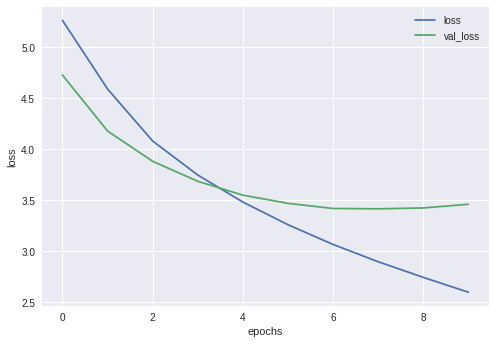

In [30]:
import matplotlib.pyplot as plt
for label in ["loss","val_loss"]:
    plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

Curva de precisión

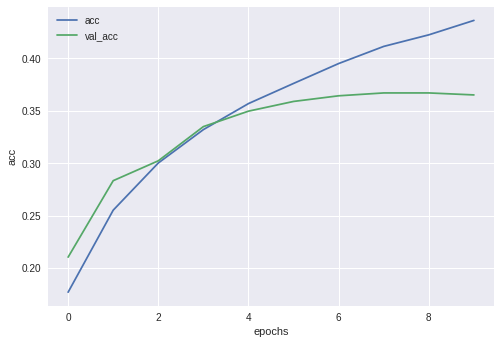

In [31]:
import matplotlib.pyplot as plt
for label in ["acc","val_acc"]:
    plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("epochs")
plt.ylabel("acc")
plt.show()

##Evaluar modelo

In [33]:
from numpy import argmax
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu


# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

# load photo features
def load_photo_features(filename, dataset):
	# load all features
	all_features = load(open(filename, 'rb'))
	# filter features
	features = {k: all_features[k] for k in dataset}
	return features

# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# calculate the length of the description with the most words
def max_length(descriptions):
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = 'startseq'
	# iterate over the whole length of the sequence
	for _ in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endseq':
			break
	return in_text

# remove start/end sequence tokens from a summary
def cleanup_summary(summary):
	# remove start of sequence token
	index = summary.find('startseq ')
	if index > -1:
		summary = summary[len('startseq '):]
	# remove end of sequence token
	index = summary.find(' endseq')
	if index > -1:
		summary = summary[:index]
	return summary

# evaluate the skill of the model
def evaluate_model(model, descriptions, photos, tokenizer, max_length):
	actual, predicted = list(), list()
	# step over the whole set
	for key, desc_list in descriptions.items():
		# generate description
		yhat = generate_desc(model, tokenizer, photos[key], max_length)
		# clean up prediction
		yhat = cleanup_summary(yhat)
		# store actual and predicted
		references = [cleanup_summary(d).split() for d in desc_list]
		actual.append(references)
		predicted.append(yhat.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))
	print(corpus_bleu(actual, predicted))

# load training dataset (6K)
filename = 'Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)

# load test set
filename = 'Flickr_8k.testImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))
# descriptions
test_descriptions = load_clean_descriptions('descriptions.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
# photo features
test_features = load_photo_features('features.pkl', test)
print('Photos: test=%d' % len(test_features))

# load the model
filename = 'model1.h5'
model = load_model(filename)
# evaluate model
evaluate_model(model, test_descriptions, test_features, tokenizer, max_length)

Dataset: 6000
Descriptions: train=6000
Vocabulary Size: 3811
Description Length: 37
Dataset: 1000
Descriptions: test=1000
Photos: test=1000
BLEU-1: 0.227554
BLEU-2: 0.121441
BLEU-3: 0.086299
BLEU-4: 0.039169
0.039168720925461566


#Desarrollo modelo Deep Learning: BaseLine1 + CNN (Inception)

La estructura que estamos utilizando es una red CNN(VGG en el modelo anterior) que nos permitirá sacar la features, y después una red CNN(que utillizaremos LSTM). Después de haber desarrollado el modelo anterior, se considera que una de las mejoras que puede tener el modelo es la utilización de otra arquitectura preentrenada. Debido a que la red VGG ha quedado un poco en deshuso debido a que tarda mucho en entrenar, viendo la comparativa de arquitecturas existentes en la literatura, se decide emplear InceptionV3. A partir de esta arquitectura se implementarán todas las mejoras a nivel de parámetros que nos permitan mejorar el rendimiento del modelo.


##Cargar features (CNN)

In [19]:
from os import listdir
from os import path
from pickle import dump
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.inception_v3 import preprocess_input
from keras.models import Model

# extract features from each photo in the directory
def extract_features(directory):
	# load the model
	model = InceptionV3(weights='imagenet', include_top=False, pooling='avg')
	# summarize
	model.summary()
	# extract features from each photo
	features = dict()
	for name in listdir(directory):
		# load an image from file
		filename = path.join(directory, name)
		image = load_img(filename, target_size=(299, 299))
		# convert the image pixels to a numpy array
		image = img_to_array(image)
		# reshape data for the model
		image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
		# prepare the image for the InceptionV3 model
		image = preprocess_input(image)
		# get features
		feature = model.predict(image, verbose=0)
		# get image id
		image_id = name.split('.')[0]
		# store feature
		features[image_id] = feature
		#print('>%s' % name)
	return features

# extract features from all images
directory = 'Flicker8k_Dataset'
features = extract_features(directory)
print('Extracted Features: %d' % len(features))
# save to file
dump(features, open('features2.pkl', 'wb')) 

87916544/87910968 [==============================] - 2s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
____________________________________________

concatenate_2 (Concatenate)     (None, None, None, 7 0           activation_83[0][0]              
                                                                 activation_84[0][0]              
__________________________________________________________________________________________________
activation_85 (Activation)      (None, None, None, 1 0           batch_normalization_85[0][0]     
__________________________________________________________________________________________________
mixed9 (Concatenate)            (None, None, None, 2 0           activation_77[0][0]              
                                                                 mixed9_0[0][0]                   
                                                                 concatenate_2[0][0]              
                                                                 activation_85[0][0]              
__________________________________________________________________________________________________
conv2d_90 

##Cargar Datos

In [34]:
from pickle import load

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

# load photo features
def load_photo_features(filename, dataset):
	# load all features
	all_features = load(open(filename, 'rb'))
	# filter features
	features = {k: all_features[k] for k in dataset}
	return features

# load training dataset (6K)
filename = 'Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# photo features
train_features = load_photo_features('features2.pkl', train)
print('Photos: train=%d' % len(train_features))

Dataset: 6000
Descriptions: train=6000
Photos: train=6000


##Entrenar modelo

In [38]:
from numpy import array
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers import RepeatVector
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras import optimizers
from keras.layers import concatenate

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

# load photo features
def load_photo_features(filename, dataset):
	# load all features
	all_features = load(open(filename, 'rb'))
	# filter features
	features = {k: all_features[k] for k in dataset}
	return features

# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# calculate the length of the description with the most words
def max_length(descriptions):
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)

# create sequences of images, input sequences and output words for an image
def create_sequences(tokenizer, max_length, descriptions, photos):
	X1, X2, y = list(), list(), list()
	# walk through each image identifier
	for key, desc_list in descriptions.items():
		# walk through each description for the image
		for desc in desc_list:
			# encode the sequence
			seq = tokenizer.texts_to_sequences([desc])[0]
			# split one sequence into multiple X,y pairs
			for i in range(1, len(seq)):
				# split into input and output pair
				in_seq, out_seq = seq[:i], seq[i]
				# pad input sequence
				in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
				# encode output sequence
				out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
				# store
				X1.append(photos[key][0])
				X2.append(in_seq)
				y.append(out_seq)
	return array(X1), array(X2), array(y)

# define the captioning model
def define_model(vocab_size, max_length):
	# feature extractor (encoder)
	inputs1 = Input(shape=(2048,))
	fe2 = Dense(128, activation='relu')(inputs1)
	fe3 = RepeatVector(max_length)(fe2)
	# embedding
	inputs2 = Input(shape=(max_length,))
	emb2 = Embedding(vocab_size, 50, mask_zero=True)(inputs2)
	emb3 = LSTM(256, return_sequences=True)(emb2)
	emb4 = TimeDistributed(Dense(128, activation='relu'))(emb3)
	# merge inputs
	merged = concatenate([fe3, emb4])
	# language model (decoder)
	lm2 = LSTM(500)(merged)
	lm3 = Dense(500, activation='relu')(lm2)
	outputs = Dense(vocab_size, activation='softmax')(lm3)
	# tie it together [image, seq] [word]
	model = Model(inputs=[inputs1, inputs2], outputs=outputs)
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	print(model.summary())
	return model

# load training dataset (6K)
filename = 'Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# photo features
train_features = load_photo_features('features2.pkl', train)
print('Photos: train=%d' % len(train_features))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)
# prepare sequences
X1train, X2train, ytrain = create_sequences(tokenizer, max_length, train_descriptions, train_features)

# load test set
filename = 'Flickr_8k.devImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))
# descriptions
test_descriptions = load_clean_descriptions('descriptions.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
# photo features
test_features = load_photo_features('features2.pkl', test)
print('Photos: test=%d' % len(test_features))
# prepare sequences
X1test, X2test, ytest = create_sequences(tokenizer, max_length, test_descriptions, test_features)

# define the model
model = define_model(vocab_size, max_length)
# define checkpoint callback
checkpoint = ModelCheckpoint('modelv3a.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# fit model
hist = model.fit([X1train, X2train], ytrain, epochs=10,batch_size=512, verbose=2, callbacks=[checkpoint], validation_data=([X1test, X2test], ytest))

Dataset: 6000
Descriptions: train=6000
Photos: train=6000
Vocabulary Size: 3811
Description Length: 37
Dataset: 1000
Descriptions: test=1000
Photos: test=1000
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 37)           0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 37, 50)       190550      input_4[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 128)      

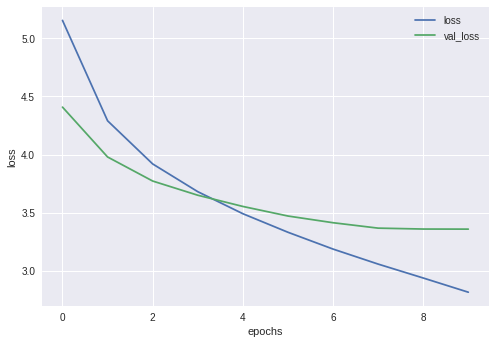

In [2]:
import matplotlib.pyplot as plt
for label in ["loss","val_loss"]:
    plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

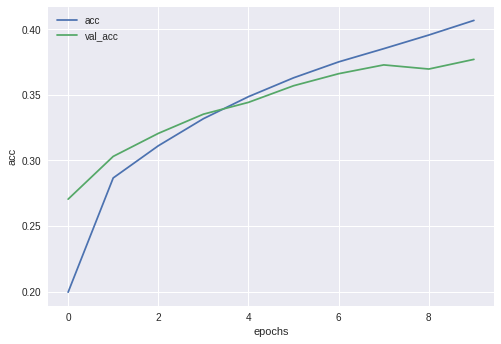

In [3]:
import matplotlib.pyplot as plt
for label in ["acc","val_acc"]:
    plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("epochs")
plt.ylabel("acc")
plt.show()

Tanto en la curva de pérdidas como en la curva de precisión podemos observar que existe overfitting (aunque no de forma exagerada), lo que no permitirá la generalización y no funcionará bien cuando se introduzcan imágenes que no pertenezcan a nuestro dataset entrenado.

##Evaluar modelo

In [3]:
from numpy import argmax
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu


# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

# load photo features
def load_photo_features(filename, dataset):
	# load all features
	all_features = load(open(filename, 'rb'))
	# filter features
	features = {k: all_features[k] for k in dataset}
	return features

# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# calculate the length of the description with the most words
def max_length(descriptions):
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = 'startseq'
	# iterate over the whole length of the sequence
	for _ in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endseq':
			break
	return in_text

# remove start/end sequence tokens from a summary
def cleanup_summary(summary):
	# remove start of sequence token
	index = summary.find('startseq ')
	if index > -1:
		summary = summary[len('startseq '):]
	# remove end of sequence token
	index = summary.find(' endseq')
	if index > -1:
		summary = summary[:index]
	return summary

# evaluate the skill of the model
def evaluate_model(model, descriptions, photos, tokenizer, max_length):
	actual, predicted = list(), list()
	# step over the whole set
	for key, desc_list in descriptions.items():
		# generate description
		yhat = generate_desc(model, tokenizer, photos[key], max_length)
		# clean up prediction
		yhat = cleanup_summary(yhat)
		# store actual and predicted
		references = [cleanup_summary(d).split() for d in desc_list]
		actual.append(references)
		predicted.append(yhat.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

# load training dataset (6K)
filename = 'Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)

# load test set
filename = 'Flickr_8k.testImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))
# descriptions
test_descriptions = load_clean_descriptions('descriptions.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
# photo features
test_features = load_photo_features('features2.pkl', test)
print('Photos: test=%d' % len(test_features))

# load the model
filename = 'modelv3a.h5'
model = load_model(filename)
# evaluate model
evaluate_model(model, test_descriptions, test_features, tokenizer, max_length)

Dataset: 6000
Descriptions: train=6000
Vocabulary Size: 3811
Description Length: 37
Dataset: 1000
Descriptions: test=1000
Photos: test=1000
BLEU-1: 0.250671
BLEU-2: 0.140163
BLEU-3: 0.104102
BLEU-4: 0.048725


##Tokenizer

In [39]:
from keras.preprocessing.text import Tokenizer
from pickle import dump

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# load training dataset
filename = 'Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
# save the tokenizer
dump(tokenizer, open('tokenizer.pkl', 'wb'))

Dataset: 6000
Descriptions: train=6000


##Para sacar imagen de prueba

In [41]:
from pickle import load
from numpy import argmax
from keras.preprocessing.sequence import pad_sequences
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.inception_v3 import preprocess_input
from keras.models import Model
from keras.models import load_model
import PIL 

# extract features from each photo in the directory
def extract_features(filename):
	# load the model
	model = InceptionV3(weights='imagenet', include_top=False, pooling='avg')
	# load the photo
	image = load_img(filename, target_size=(299, 299))
	# convert the image pixels to a numpy array
	image = img_to_array(image)
	# reshape data for the model
	image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
	# prepare the image for the InceptionV3 model
	image = preprocess_input(image)
	# get features
	feature = model.predict(image, verbose=0)
	return feature

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# remove start/end sequence tokens from a summary
def cleanup_summary(summary):
	# remove start of sequence token
	index = summary.find('startseq ')
	if index > -1:
		summary = summary[len('startseq '):]
	# remove end of sequence token
	index = summary.find(' endseq')
	if index > -1:
		summary = summary[:index]
	return summary

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = 'startseq'
	# iterate over the whole length of the sequence
	for _ in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endseq':
			break
	return in_text

# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))
# pre-define the max sequence length (from training)
max_length = 34
# load the model
model = load_model('modelv3a.h5')
# load and prepare the photograph
photo = extract_features('perro4.jpeg')
# generate description
description = generate_desc(model, tokenizer, photo, 37)
description = cleanup_summary(description)
print(description)

87916544/87910968 [==============================] - 3s 0us/step
a dog is running through the grass


(-0.5, 289.5, 173.5, -0.5)

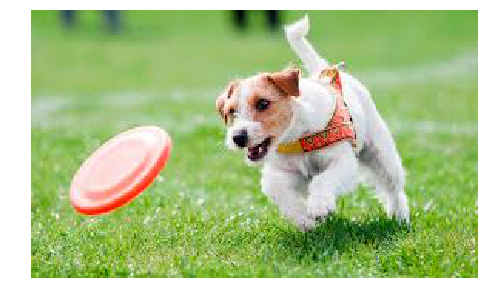

In [42]:
img = load_img('perro4.jpeg')
plt.imshow(img)
plt.axis('off')

In [46]:
from pickle import load
from numpy import argmax
from keras.preprocessing.sequence import pad_sequences
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.inception_v3 import preprocess_input
from keras.models import Model
from keras.models import load_model
import PIL 

# extract features from each photo in the directory
def extract_features(filename):
	# load the model
	model = InceptionV3(weights='imagenet', include_top=False, pooling='avg')
	# load the photo
	image = load_img(filename, target_size=(299, 299))
	# convert the image pixels to a numpy array
	image = img_to_array(image)
	# reshape data for the model
	image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
	# prepare the image for the InceptionV3 model
	image = preprocess_input(image)
	# get features
	feature = model.predict(image, verbose=0)
	return feature

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# remove start/end sequence tokens from a summary
def cleanup_summary(summary):
	# remove start of sequence token
	index = summary.find('startseq ')
	if index > -1:
		summary = summary[len('startseq '):]
	# remove end of sequence token
	index = summary.find(' endseq')
	if index > -1:
		summary = summary[:index]
	return summary

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = 'startseq'
	# iterate over the whole length of the sequence
	for _ in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endseq':
			break
	return in_text

# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))
# pre-define the max sequence length (from training)
max_length = 34
# load the model
model = load_model('modelv3a.h5')
# load and prepare the photograph
photo = extract_features('correr2.jpeg')
# generate description
description = generate_desc(model, tokenizer, photo, 37)
description = cleanup_summary(description)
print(description)

a boy in a red shirt is jumping into the water


(-0.5, 274.5, 182.5, -0.5)

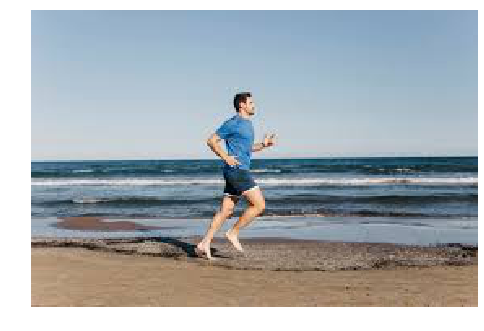

In [48]:
img = load_img('correr2.jpeg')
plt.imshow(img)
plt.axis('off')

Como podemos observar hemos mejorado con respecto al primer modelo (con arquitectura vgg), pero tenemos que realizar ajustes para poder mejorar la precisión del modelo. Como se está cogiendo imágenes aleatorias de internet es muy importante controlar el overfitting.

#Mejora 1

El overfitting se puede resolver con normalización o con regularización. Vamos a añadir BatchNormalization antes de la capa de activación.
Debido a que ha habido overfitting en el modelo anterior, vamos a probar añadiendo Dropout para eliminar neuronas. Además las capas densas las ponemos de 256 neuronas según indica el artículo de Marc Tanti: What is the Role of Recurrent Neural Networks in an Image Caption Generation?

#Entrenar modelo

In [53]:
from numpy import array
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers import RepeatVector
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras import optimizers
from keras.layers import concatenate
from keras.layers.normalization import BatchNormalization

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

# load photo features
def load_photo_features(filename, dataset):
	# load all features
	all_features = load(open(filename, 'rb'))
	# filter features
	features = {k: all_features[k] for k in dataset}
	return features

# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# calculate the length of the description with the most words
def max_length(descriptions):
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)

# create sequences of images, input sequences and output words for an image
def create_sequences(tokenizer, max_length, descriptions, photos):
	X1, X2, y = list(), list(), list()
	# walk through each image identifier
	for key, desc_list in descriptions.items():
		# walk through each description for the image
		for desc in desc_list:
			# encode the sequence
			seq = tokenizer.texts_to_sequences([desc])[0]
			# split one sequence into multiple X,y pairs
			for i in range(1, len(seq)):
				# split into input and output pair
				in_seq, out_seq = seq[:i], seq[i]
				# pad input sequence
				in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
				# encode output sequence
				out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
				# store
				X1.append(photos[key][0])
				X2.append(in_seq)
				y.append(out_seq)
	return array(X1), array(X2), array(y)


# define the captioning model
def define_model(vocab_size, max_length):
# feature extractor (encoder)
	inputs1 = Input(shape=(2048,))
	fe1 = Dropout(0.5) (inputs1)
	fe1b = BatchNormalization()(fe1)
	fe2 = Dense(256, activation='relu')(fe1)
	fe3 = RepeatVector(max_length)(fe2)
	# embedding
	inputs2 = Input(shape=(max_length,))
	emb2 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
	emb2b = Dropout(0.5)(emb2)
	emb3 = LSTM(256, return_sequences=True)(emb2b)
	emb4 = TimeDistributed(Dense(256, activation='relu'))(emb3)
	# merge inputs
	merged = concatenate([fe3, emb4])
	# language model (decoder)
	lm2 = LSTM(256)(merged)
	lm3 = Dense(256, activation='relu')(lm2)
	outputs = Dense(vocab_size, activation='softmax')(lm3)
	# tie it together [image, seq] [word]
	model = Model(inputs=[inputs1, inputs2], outputs=outputs)
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	print(model.summary())
	return model

# load training dataset (6K)
filename = 'Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# photo features
train_features = load_photo_features('features2.pkl', train)
print('Photos: train=%d' % len(train_features))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)
# prepare sequences
X1train, X2train, ytrain = create_sequences(tokenizer, max_length, train_descriptions, train_features)

# load test set
filename = 'Flickr_8k.devImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))
# descriptions
test_descriptions = load_clean_descriptions('descriptions.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
# photo features
test_features = load_photo_features('features2.pkl', test)
print('Photos: test=%d' % len(test_features))
# prepare sequences
X1test, X2test, ytest = create_sequences(tokenizer, max_length, test_descriptions, test_features)

# define the model
model = define_model(vocab_size, max_length)
# define checkpoint callback
checkpoint = ModelCheckpoint('modelv3b.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# fit model
hist = model.fit([X1train, X2train], ytrain, epochs=10,batch_size=512, verbose=2, callbacks=[checkpoint], validation_data=([X1test, X2test], ytest))

Dataset: 6000
Descriptions: train=6000
Photos: train=6000
Vocabulary Size: 3811
Description Length: 37
Dataset: 1000
Descriptions: test=1000
Photos: test=1000
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 37)           0                                            
__________________________________________________________________________________________________
input_11 (InputLayer)           (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 37, 256)      975616      input_12[0][0]                   
__________________________________________________________________________________________________
dropout_3 (Dropout)             (None, 2048)     

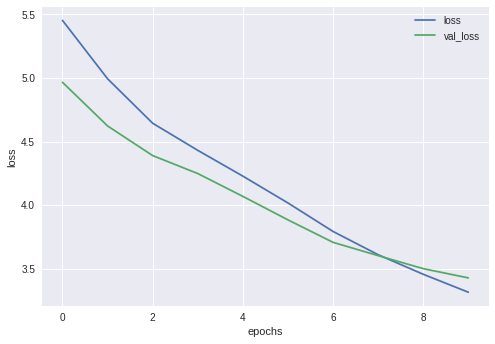

In [54]:
import matplotlib.pyplot as plt
for label in ["loss","val_loss"]:
    plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

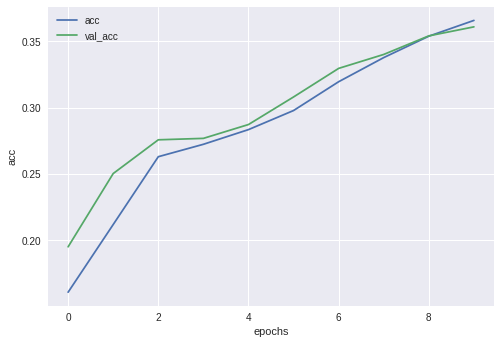

In [55]:
import matplotlib.pyplot as plt
for label in ["acc","val_acc"]:
    plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("epochs")
plt.ylabel("acc")
plt.show()

Como podemos ver el overfitting se ha reducido de forma muy notable, aunque lo resultados se pueden mejorar

In [56]:
from numpy import argmax
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu


# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

# load photo features
def load_photo_features(filename, dataset):
	# load all features
	all_features = load(open(filename, 'rb'))
	# filter features
	features = {k: all_features[k] for k in dataset}
	return features

# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# calculate the length of the description with the most words
def max_length(descriptions):
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = 'startseq'
	# iterate over the whole length of the sequence
	for _ in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endseq':
			break
	return in_text

# remove start/end sequence tokens from a summary
def cleanup_summary(summary):
	# remove start of sequence token
	index = summary.find('startseq ')
	if index > -1:
		summary = summary[len('startseq '):]
	# remove end of sequence token
	index = summary.find(' endseq')
	if index > -1:
		summary = summary[:index]
	return summary

# evaluate the skill of the model
def evaluate_model(model, descriptions, photos, tokenizer, max_length):
	actual, predicted = list(), list()
	# step over the whole set
	for key, desc_list in descriptions.items():
		# generate description
		yhat = generate_desc(model, tokenizer, photos[key], max_length)
		# clean up prediction
		yhat = cleanup_summary(yhat)
		# store actual and predicted
		references = [cleanup_summary(d).split() for d in desc_list]
		actual.append(references)
		predicted.append(yhat.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

# load training dataset (6K)
filename = 'Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)

# load test set
filename = 'Flickr_8k.testImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))
# descriptions
test_descriptions = load_clean_descriptions('descriptions.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
# photo features
test_features = load_photo_features('features2.pkl', test)
print('Photos: test=%d' % len(test_features))

# load the model
filename = 'modelv3b.h5'
model = load_model(filename)
# evaluate model
evaluate_model(model, test_descriptions, test_features, tokenizer, max_length)

Dataset: 6000
Descriptions: train=6000
Vocabulary Size: 3811
Description Length: 37
Dataset: 1000
Descriptions: test=1000
Photos: test=1000
BLEU-1: 0.237925
BLEU-2: 0.125944
BLEU-3: 0.086994
BLEU-4: 0.035102


Se obtienen peores resultados cuando se realizan las pruebas con respecto a test, pero debido a una mayor capacidad que generalización debería ser capaz de acertar imágenes que no se encuentren en el dataset entrenado.

#Mejora 2

Ahora que hemos reducido el overfitting, vamos a intentar que mejore el rendimiento modificando parámetros del optimizer.

In [59]:
from numpy import array
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras import optimizers

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

# load photo features
def load_photo_features(filename, dataset):
	# load all features
	all_features = load(open(filename, 'rb'))
	# filter features
	features = {k: all_features[k] for k in dataset}
	return features

# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# calculate the length of the description with the most words
def max_length(descriptions):
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)

# create sequences of images, input sequences and output words for an image
def create_sequences(tokenizer, max_length, descriptions, photos):
	X1, X2, y = list(), list(), list()
	# walk through each image identifier
	for key, desc_list in descriptions.items():
		# walk through each description for the image
		for desc in desc_list:
			# encode the sequence
			seq = tokenizer.texts_to_sequences([desc])[0]
			# split one sequence into multiple X,y pairs
			for i in range(1, len(seq)):
				# split into input and output pair
				in_seq, out_seq = seq[:i], seq[i]
				# pad input sequence
				in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
				# encode output sequence
				out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
				# store
				X1.append(photos[key][0])
				X2.append(in_seq)
				y.append(out_seq)
	return array(X1), array(X2), array(y)


# define the captioning model
def define_model(vocab_size, max_length):
# feature extractor (encoder)
	inputs1 = Input(shape=(2048,))
	fe1 = Dropout(0.5) (inputs1)
	fe1b = BatchNormalization()(fe1)
	fe2 = Dense(256, activation='relu')(fe1)
	fe3 = RepeatVector(max_length)(fe2)
	# embedding
	inputs2 = Input(shape=(max_length,))
	emb2 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
	emb2b = Dropout(0.5)(emb2)
	emb3 = LSTM(256, return_sequences=True)(emb2b)
	emb4 = TimeDistributed(Dense(256, activation='relu'))(emb3)
	# merge inputs
	merged = concatenate([fe3, emb4])
	# language model (decoder)
	lm2 = LSTM(256)(merged)
	lm3 = Dense(256, activation='relu')(lm2)
	outputs = Dense(vocab_size, activation='softmax')(lm3)
	# tie it together [image, seq] [word]
	model = Model(inputs=[inputs1, inputs2], outputs=outputs)
	# compile model
	optimizer= optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001/10, amsgrad=False)
	model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	print(model.summary())
	return model

# load training dataset (6K)
filename = 'Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# photo features
train_features = load_photo_features('features2.pkl', train)
print('Photos: train=%d' % len(train_features))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)
# prepare sequences
X1train, X2train, ytrain = create_sequences(tokenizer, max_length, train_descriptions, train_features)

# load test set
filename = 'Flickr_8k.devImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))
# descriptions
test_descriptions = load_clean_descriptions('descriptions.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
# photo features
test_features = load_photo_features('features2.pkl', test)
print('Photos: test=%d' % len(test_features))
# prepare sequences
X1test, X2test, ytest = create_sequences(tokenizer, max_length, test_descriptions, test_features)

# define the model
model = define_model(vocab_size, max_length)
# define checkpoint callback
checkpoint = ModelCheckpoint('modelv3b2.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# fit model
hist = model.fit([X1train, X2train], ytrain, epochs=10,batch_size=512, verbose=2, callbacks=[checkpoint], validation_data=([X1test, X2test], ytest))

Dataset: 6000
Descriptions: train=6000
Photos: train=6000
Vocabulary Size: 3811
Description Length: 37
Dataset: 1000
Descriptions: test=1000
Photos: test=1000
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           (None, 37)           0                                            
__________________________________________________________________________________________________
input_14 (InputLayer)           (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 37, 256)      975616      input_15[0][0]                   
__________________________________________________________________________________________________
dropout_5 (Dropout)             (None, 2048)     


Epoch 00010: val_loss improved from 3.44438 to 3.37032, saving model to modelv3b2.h5


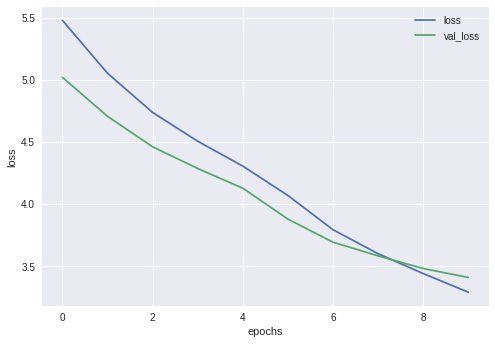

In [8]:
import matplotlib.pyplot as plt
for label in ["loss","val_loss"]:
    plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

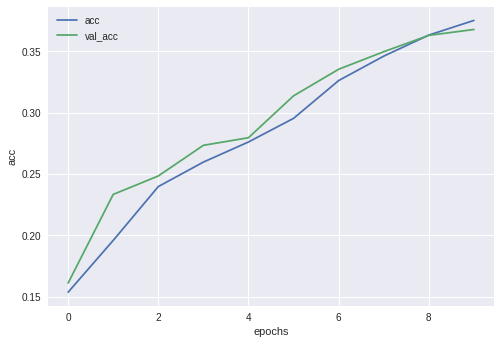

In [9]:
import matplotlib.pyplot as plt
for label in ["acc","val_acc"]:
    plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("epochs")
plt.ylabel("acc")
plt.show()

Como se puede observar no existe overfitting, pero el accuracy se debería poder aumentar.

#Mejora 3

Procedemos a aumentar el número de neuronas para mejorar el accuracy.

In [10]:
from numpy import array
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras import optimizers

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

# load photo features
def load_photo_features(filename, dataset):
	# load all features
	all_features = load(open(filename, 'rb'))
	# filter features
	features = {k: all_features[k] for k in dataset}
	return features

# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# calculate the length of the description with the most words
def max_length(descriptions):
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)

# create sequences of images, input sequences and output words for an image
def create_sequences(tokenizer, max_length, descriptions, photos):
	X1, X2, y = list(), list(), list()
	# walk through each image identifier
	for key, desc_list in descriptions.items():
		# walk through each description for the image
		for desc in desc_list:
			# encode the sequence
			seq = tokenizer.texts_to_sequences([desc])[0]
			# split one sequence into multiple X,y pairs
			for i in range(1, len(seq)):
				# split into input and output pair
				in_seq, out_seq = seq[:i], seq[i]
				# pad input sequence
				in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
				# encode output sequence
				out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
				# store
				X1.append(photos[key][0])
				X2.append(in_seq)
				y.append(out_seq)
	return array(X1), array(X2), array(y)


# define the captioning model
def define_model(vocab_size, max_length):
# feature extractor (encoder)
	inputs1 = Input(shape=(2048,))
	fe1 = Dropout(0.5) (inputs1)
	fe1b = BatchNormalization()(fe1)
	fe2 = Dense(512, activation='relu')(fe1)
	fe3 = RepeatVector(max_length)(fe2)
	# embedding
	inputs2 = Input(shape=(max_length,))
	emb2 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
	emb2b = Dropout(0.5)(emb2)
	emb3 = LSTM(512, return_sequences=True)(emb2b)
	emb4 = TimeDistributed(Dense(256, activation='relu'))(emb3)
	# merge inputs
	merged = concatenate([fe3, emb4])
	# language model (decoder)
	lm2 = LSTM(512)(merged)
	lm3 = Dense(512, activation='relu')(lm2)
	outputs = Dense(vocab_size, activation='softmax')(lm3)
	# tie it together [image, seq] [word]
	model = Model(inputs=[inputs1, inputs2], outputs=outputs)
	# compile model
	optimizer= optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001/10, amsgrad=False)
	model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	print(model.summary())
	return model

# load training dataset (6K)
filename = 'Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# photo features
train_features = load_photo_features('features2.pkl', train)
print('Photos: train=%d' % len(train_features))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)
# prepare sequences
X1train, X2train, ytrain = create_sequences(tokenizer, max_length, train_descriptions, train_features)

# load test set
filename = 'Flickr_8k.devImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))
# descriptions
test_descriptions = load_clean_descriptions('descriptions.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
# photo features
test_features = load_photo_features('features2.pkl', test)
print('Photos: test=%d' % len(test_features))
# prepare sequences
X1test, X2test, ytest = create_sequences(tokenizer, max_length, test_descriptions, test_features)

# define the model
model = define_model(vocab_size, max_length)
# define checkpoint callback
checkpoint = ModelCheckpoint('modelv3c.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# fit model
hist = model.fit([X1train, X2train], ytrain, epochs=10,batch_size=512, verbose=2, callbacks=[checkpoint], validation_data=([X1test, X2test], ytest))

Dataset: 6000
Descriptions: train=6000
Photos: train=6000
Vocabulary Size: 3811
Description Length: 37
Dataset: 1000
Descriptions: test=1000
Photos: test=1000
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 37)           0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 37, 256)      975616      input_9[0][0]                    
__________________________________________________________________________________________________
dropout_8 (Dropout)             (None, 2048)     


Epoch 00008: val_loss improved from 3.40158 to 3.34421, saving model to modelv3c.h5
Epoch 9/10
 - 80s - loss: 3.0397 - acc: 0.3910 - val_loss: 3.2933 - val_acc: 0.3792

Epoch 00009: val_loss improved from 3.34421 to 3.29331, saving model to modelv3c.h5
Epoch 10/10
 - 80s - loss: 2.9293 - acc: 0.4005 - val_loss: 3.2852 - val_acc: 0.3834

Epoch 00010: val_loss improved from 3.29331 to 3.28524, saving model to modelv3c.h5


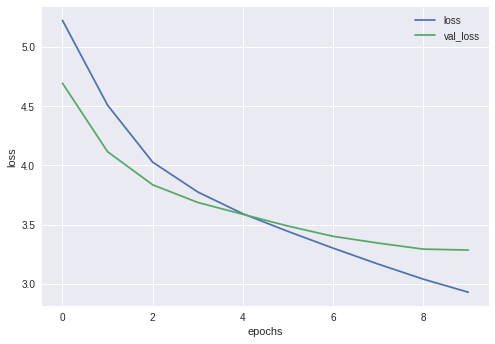

In [11]:
import matplotlib.pyplot as plt
for label in ["loss","val_loss"]:
    plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

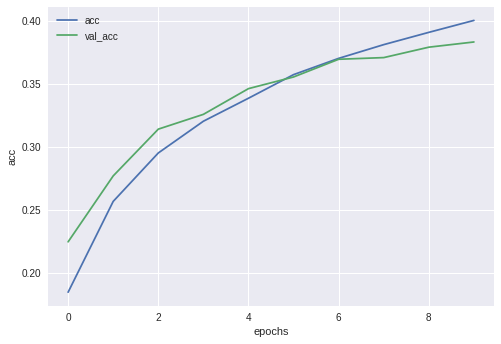

In [12]:
import matplotlib.pyplot as plt
for label in ["acc","val_acc"]:
    plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("epochs")
plt.ylabel("acc")
plt.show()

##Evaluar modelo

In [61]:
from numpy import argmax
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu


# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

# load photo features
def load_photo_features(filename, dataset):
	# load all features
	all_features = load(open(filename, 'rb'))
	# filter features
	features = {k: all_features[k] for k in dataset}
	return features

# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# calculate the length of the description with the most words
def max_length(descriptions):
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = 'startseq'
	# iterate over the whole length of the sequence
	for _ in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endseq':
			break
	return in_text

# remove start/end sequence tokens from a summary
def cleanup_summary(summary):
	# remove start of sequence token
	index = summary.find('startseq ')
	if index > -1:
		summary = summary[len('startseq '):]
	# remove end of sequence token
	index = summary.find(' endseq')
	if index > -1:
		summary = summary[:index]
	return summary

# evaluate the skill of the model
def evaluate_model(model, descriptions, photos, tokenizer, max_length):
	actual, predicted = list(), list()
	# step over the whole set
	for key, desc_list in descriptions.items():
		# generate description
		yhat = generate_desc(model, tokenizer, photos[key], max_length)
		# clean up prediction
		yhat = cleanup_summary(yhat)
		# store actual and predicted
		references = [cleanup_summary(d).split() for d in desc_list]
		actual.append(references)
		predicted.append(yhat.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

# load training dataset (6K)
filename = 'Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)

# load test set
filename = 'Flickr_8k.testImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))
# descriptions
test_descriptions = load_clean_descriptions('descriptions.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
# photo features
test_features = load_photo_features('features2.pkl', test)
print('Photos: test=%d' % len(test_features))

# load the model
filename = 'modelv3c.h5'
model = load_model(filename)
# evaluate model
evaluate_model(model, test_descriptions, test_features, tokenizer, max_length)

Dataset: 6000
Descriptions: train=6000
Vocabulary Size: 3811
Description Length: 37
Dataset: 1000
Descriptions: test=1000
Photos: test=1000
BLEU-1: 0.251124
BLEU-2: 0.136901
BLEU-3: 0.098684
BLEU-4: 0.044707


Hemos mejorado el accuracy con muy poco overfitting, por lo que nos indica que estamos optimizando los parámetros de la forma adecuada

#Mejora 4

Se va a intentar mejorar el rendimiento al aumentar todavía más el número de neuronas de las capas

In [1]:
!ls

CrowdFlowerAnnotations.txt  Flickr8k_Dataset.zip       __MACOSX
datalab			    Flickr_8k.devImages.txt    model1.h5
descriptions.txt	    Flickr8k.lemma.token.txt   modelv3b.h5
ExpertAnnotations.txt	    Flickr_8k.testImages.txt   modelv3c.h5
features2.pkl		    Flickr8k_text.zip	       readme.txt
features.pkl		    Flickr8k.token.txt
Flicker8k_Dataset	    Flickr_8k.trainImages.txt


In [4]:
from numpy import array
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras import optimizers

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

# load photo features
def load_photo_features(filename, dataset):
	# load all features
	all_features = load(open(filename, 'rb'))
	# filter features
	features = {k: all_features[k] for k in dataset}
	return features

# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# calculate the length of the description with the most words
def max_length(descriptions):
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)

# create sequences of images, input sequences and output words for an image
def create_sequences(tokenizer, max_length, descriptions, photos):
	X1, X2, y = list(), list(), list()
	# walk through each image identifier
	for key, desc_list in descriptions.items():
		# walk through each description for the image
		for desc in desc_list:
			# encode the sequence
			seq = tokenizer.texts_to_sequences([desc])[0]
			# split one sequence into multiple X,y pairs
			for i in range(1, len(seq)):
				# split into input and output pair
				in_seq, out_seq = seq[:i], seq[i]
				# pad input sequence
				in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
				# encode output sequence
				out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
				# store
				X1.append(photos[key][0])
				X2.append(in_seq)
				y.append(out_seq)
	return array(X1), array(X2), array(y)


# define the captioning model
def define_model(vocab_size, max_length):
# feature extractor (encoder)
	inputs1 = Input(shape=(2048,))
	fe1 = Dropout(0.5) (inputs1)
	fe1b = BatchNormalization()(fe1)
	fe2 = Dense(1024, activation='relu')(fe1)
	fe3 = RepeatVector(max_length)(fe2)
	# embedding
	inputs2 = Input(shape=(max_length,))
	emb2 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
	emb2b = Dropout(0.5)(emb2)
	emb3 = LSTM(1024, return_sequences=True)(emb2b)
	emb4 = TimeDistributed(Dense(256, activation='relu'))(emb3)
	# merge inputs
	merged = concatenate([fe3, emb4])
	# language model (decoder)
	lm2 = LSTM(1024)(merged)
	lm3 = Dense(1024, activation='relu')(lm2)
	outputs = Dense(vocab_size, activation='softmax')(lm3)
	# tie it together [image, seq] [word]
	model = Model(inputs=[inputs1, inputs2], outputs=outputs)
	# compile model
	optimizer= optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001/10, amsgrad=False)
	model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	print(model.summary())
	return model

# load training dataset (6K)
filename = 'Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# photo features
train_features = load_photo_features('features2.pkl', train)
print('Photos: train=%d' % len(train_features))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)
# prepare sequences
X1train, X2train, ytrain = create_sequences(tokenizer, max_length, train_descriptions, train_features)

# load test set
filename = 'Flickr_8k.devImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))
# descriptions
test_descriptions = load_clean_descriptions('descriptions.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
# photo features
test_features = load_photo_features('features2.pkl', test)
print('Photos: test=%d' % len(test_features))
# prepare sequences
X1test, X2test, ytest = create_sequences(tokenizer, max_length, test_descriptions, test_features)

# define the model
model = define_model(vocab_size, max_length)
# define checkpoint callback
checkpoint = ModelCheckpoint('modelv3d.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# fit model
hist = model.fit([X1train, X2train], ytrain, epochs=10,batch_size=512, verbose=2, callbacks=[checkpoint], validation_data=([X1test, X2test], ytest))

Dataset: 6000
Descriptions: train=6000
Photos: train=6000
Vocabulary Size: 3811
Description Length: 37
Dataset: 1000
Descriptions: test=1000
Photos: test=1000
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 37)           0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 37, 256)      975616      input_3[0][0]                    
__________________________________________________________________________________________________
dropout_2 (Dropout)             (None, 2048)     

 - 181s - loss: 2.8736 - acc: 0.4033 - val_loss: 3.2384 - val_acc: 0.3869

Epoch 00008: val_loss improved from 3.25923 to 3.23843, saving model to modelv3d.h5
Epoch 9/10
 - 181s - loss: 2.7486 - acc: 0.4135 - val_loss: 3.2344 - val_acc: 0.3890

Epoch 00009: val_loss improved from 3.23843 to 3.23442, saving model to modelv3d.h5
Epoch 10/10
 - 181s - loss: 2.6330 - acc: 0.4222 - val_loss: 3.2476 - val_acc: 0.3902

Epoch 00010: val_loss did not improve from 3.23442


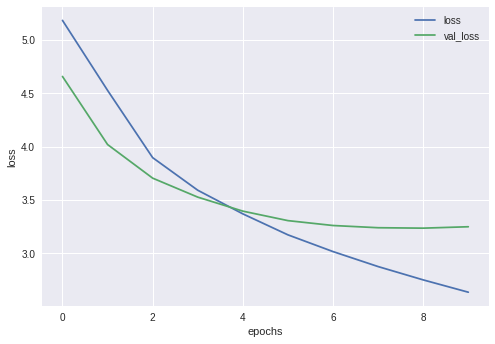

In [5]:
import matplotlib.pyplot as plt
for label in ["loss","val_loss"]:
    plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

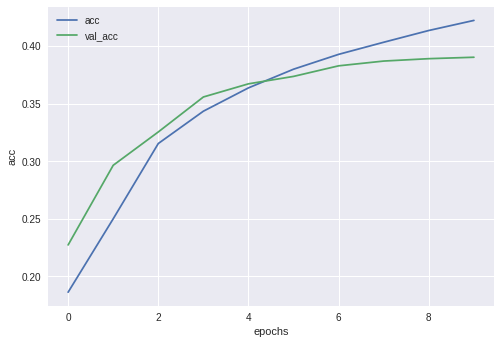

In [6]:
import matplotlib.pyplot as plt
for label in ["acc","val_acc"]:
    plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("epochs")
plt.ylabel("acc")
plt.show()

Como se puede observar aunque han mejorado parámetros como el accuracy, el overfitting aumenta de forma muy importante por lo que no lo consideramos un modelo adecuado.

#Mejora 5

En este modelo, vamos a intentar aprovechar la mejora del accuracy del modelo anterior pero aumentando la regularización que se realiza del mismo para ver si se reduce el overfitting.

In [13]:
from numpy import array
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras import optimizers

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

# load photo features
def load_photo_features(filename, dataset):
	# load all features
	all_features = load(open(filename, 'rb'))
	# filter features
	features = {k: all_features[k] for k in dataset}
	return features

# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# calculate the length of the description with the most words
def max_length(descriptions):
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)

# create sequences of images, input sequences and output words for an image
def create_sequences(tokenizer, max_length, descriptions, photos):
	X1, X2, y = list(), list(), list()
	# walk through each image identifier
	for key, desc_list in descriptions.items():
		# walk through each description for the image
		for desc in desc_list:
			# encode the sequence
			seq = tokenizer.texts_to_sequences([desc])[0]
			# split one sequence into multiple X,y pairs
			for i in range(1, len(seq)):
				# split into input and output pair
				in_seq, out_seq = seq[:i], seq[i]
				# pad input sequence
				in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
				# encode output sequence
				out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
				# store
				X1.append(photos[key][0])
				X2.append(in_seq)
				y.append(out_seq)
	return array(X1), array(X2), array(y)


# define the captioning model
def define_model(vocab_size, max_length):
# feature extractor (encoder)
	inputs1 = Input(shape=(2048,))
	fe1 = Dropout(0.7) (inputs1)
	fe1b = BatchNormalization()(fe1)
	fe2 = Dense(1024, activation='relu')(fe1)
	fe3 = RepeatVector(max_length)(fe2)
	# embedding
	inputs2 = Input(shape=(max_length,))
	emb2 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
	emb2b = Dropout(0.7)(emb2)
	emb3 = LSTM(1024, return_sequences=True)(emb2b)
	emb4 = TimeDistributed(Dense(256, activation='relu'))(emb3)
	# merge inputs
	merged = concatenate([fe3, emb4])
	# language model (decoder)
	lm2 = LSTM(1024)(merged)
	lm3 = Dense(1024, activation='relu')(lm2)
	outputs = Dense(vocab_size, activation='softmax')(lm3)
	# tie it together [image, seq] [word]
	model = Model(inputs=[inputs1, inputs2], outputs=outputs)
	# compile model
	optimizer= optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001/20, amsgrad=False)
	model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	print(model.summary())
	return model

# load training dataset (6K)
filename = 'Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# photo features
train_features = load_photo_features('features2.pkl', train)
print('Photos: train=%d' % len(train_features))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)
# prepare sequences
X1train, X2train, ytrain = create_sequences(tokenizer, max_length, train_descriptions, train_features)

# load test set
filename = 'Flickr_8k.devImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))
# descriptions
test_descriptions = load_clean_descriptions('descriptions.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
# photo features
test_features = load_photo_features('features2.pkl', test)
print('Photos: test=%d' % len(test_features))
# prepare sequences
X1test, X2test, ytest = create_sequences(tokenizer, max_length, test_descriptions, test_features)

# define the model
model = define_model(vocab_size, max_length)
# define checkpoint callback
checkpoint = ModelCheckpoint('modelv3e.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# fit model
hist = model.fit([X1train, X2train], ytrain, epochs=20,batch_size=512, verbose=2, callbacks=[checkpoint], validation_data=([X1test, X2test], ytest))

Dataset: 6000
Descriptions: train=6000
Photos: train=6000
Vocabulary Size: 3811
Description Length: 37
Dataset: 1000
Descriptions: test=1000
Photos: test=1000
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 37)           0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 37, 256)      975616      input_10[0][0]                   
__________________________________________________________________________________________________
dropout_8 (Dropout)             (None, 2048)     


Epoch 00008: val_loss improved from 3.33980 to 3.29998, saving model to modelv3e.h5
Epoch 9/20
 - 181s - loss: 2.9337 - acc: 0.3912 - val_loss: 3.2702 - val_acc: 0.3830

Epoch 00009: val_loss improved from 3.29998 to 3.27016, saving model to modelv3e.h5
Epoch 10/20
 - 181s - loss: 2.8333 - acc: 0.4004 - val_loss: 3.2670 - val_acc: 0.3879

Epoch 00010: val_loss improved from 3.27016 to 3.26704, saving model to modelv3e.h5
Epoch 11/20
 - 181s - loss: 2.7349 - acc: 0.4049 - val_loss: 3.2529 - val_acc: 0.3908

Epoch 00011: val_loss improved from 3.26704 to 3.25287, saving model to modelv3e.h5
Epoch 12/20
 - 181s - loss: 2.6486 - acc: 0.4147 - val_loss: 3.2500 - val_acc: 0.3938

Epoch 00012: val_loss improved from 3.25287 to 3.25004, saving model to modelv3e.h5
Epoch 13/20
 - 181s - loss: 2.5602 - acc: 0.4205 - val_loss: 3.2664 - val_acc: 0.3948

Epoch 00013: val_loss did not improve from 3.25004
Epoch 14/20
 - 181s - loss: 2.4793 - acc: 0.4285 - val_loss: 3.2782 - val_acc: 0.3945

Epoch 0

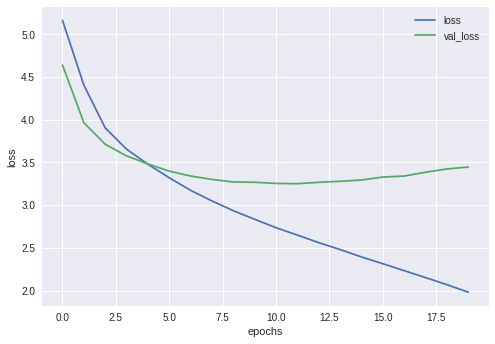

In [14]:
import matplotlib.pyplot as plt
for label in ["loss","val_loss"]:
    plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()


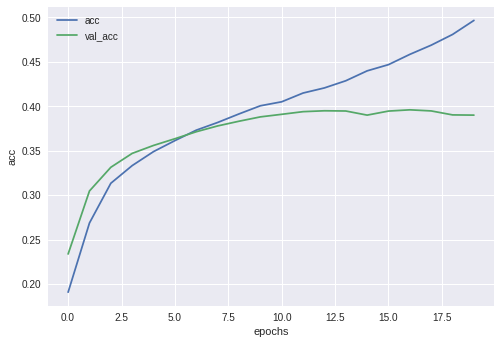

In [15]:
import matplotlib.pyplot as plt
for label in ["acc","val_acc"]:
    plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("epochs")
plt.ylabel("acc")
plt.show()

Como se puede observar, el overfitting continua siendo muy grande.

Después de haber realizado todos los modelos y comparado los resultados que obtenemos tanto de accuracy como de observar las curvas concluimos que el modelo 3 donde se han aumentado las neuronas a 512, se han introducido los parámetros en el optimizer y se ha incorporado regularización y normalización es el que mejor equilibrio proporciona. Vamos a escoger algunas imágenes aleatorias que no haya entrenado y vamos a ver un ejemplo de como funciona. 

#Imagen Prueba 1

In [20]:
from keras.preprocessing.text import Tokenizer
from pickle import dump

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# load training dataset
filename = 'Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
# save the tokenizer
dump(tokenizer, open('tokenizer.pkl', 'wb'))

Dataset: 6000
Descriptions: train=6000


(-0.5, 274.5, 182.5, -0.5)

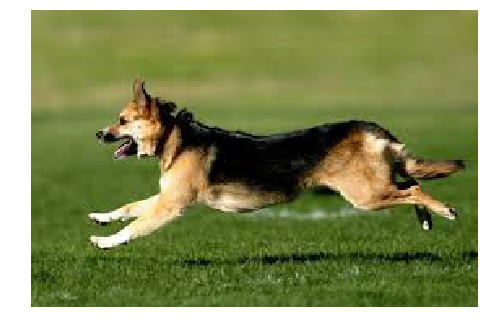

In [65]:
img = load_img('perro.jpeg')
plt.imshow(img)
plt.axis('off')

In [66]:
from pickle import load
from numpy import argmax
from keras.preprocessing.sequence import pad_sequences
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.inception_v3 import preprocess_input
from keras.models import Model
from keras.models import load_model
import PIL 

# extract features from each photo in the directory
def extract_features(filename):
	# load the model
	model = InceptionV3(weights='imagenet', include_top=False, pooling='avg')
	# load the photo
	image = load_img(filename, target_size=(299, 299))
	# convert the image pixels to a numpy array
	image = img_to_array(image)
	# reshape data for the model
	image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
	# prepare the image for the InceptionV3 model
	image = preprocess_input(image)
	# get features
	feature = model.predict(image, verbose=0)
	return feature

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# remove start/end sequence tokens from a summary
def cleanup_summary(summary):
	# remove start of sequence token
	index = summary.find('startseq ')
	if index > -1:
		summary = summary[len('startseq '):]
	# remove end of sequence token
	index = summary.find(' endseq')
	if index > -1:
		summary = summary[:index]
	return summary

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = 'startseq'
	# iterate over the whole length of the sequence
	for _ in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endseq':
			break
	return in_text

# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))
# pre-define the max sequence length (from training)
max_length = 34
# load the model
model = load_model('modelv3c.h5')
# load and prepare the photograph
photo = extract_features('perro.jpeg')
# generate description
description = generate_desc(model, tokenizer, photo, 37)
description = cleanup_summary(description)
print(description)

a black and white dog is running through the grass


#Imagen Prueba 2

(-0.5, 274.5, 182.5, -0.5)

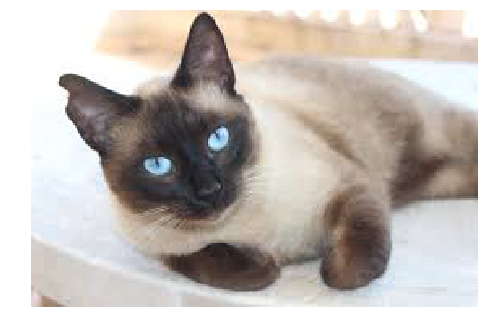

In [76]:
img = load_img('gato4.jpeg')
plt.imshow(img)
plt.axis('off')

In [75]:
from pickle import load
from numpy import argmax
from keras.preprocessing.sequence import pad_sequences
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.inception_v3 import preprocess_input
from keras.models import Model
from keras.models import load_model
import PIL 

# extract features from each photo in the directory
def extract_features(filename):
	# load the model
	model = InceptionV3(weights='imagenet', include_top=False, pooling='avg')
	# load the photo
	image = load_img(filename, target_size=(299, 299))
	# convert the image pixels to a numpy array
	image = img_to_array(image)
	# reshape data for the model
	image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
	# prepare the image for the InceptionV3 model
	image = preprocess_input(image)
	# get features
	feature = model.predict(image, verbose=0)
	return feature

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# remove start/end sequence tokens from a summary
def cleanup_summary(summary):
	# remove start of sequence token
	index = summary.find('startseq ')
	if index > -1:
		summary = summary[len('startseq '):]
	# remove end of sequence token
	index = summary.find(' endseq')
	if index > -1:
		summary = summary[:index]
	return summary

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = 'startseq'
	# iterate over the whole length of the sequence
	for _ in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endseq':
			break
	return in_text

# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))
# pre-define the max sequence length (from training)
max_length = 34
# load the model
model = load_model('modelv3c.h5')
# load and prepare the photograph
photo = extract_features('gato4.jpeg')
# generate description
description = generate_desc(model, tokenizer, photo, 37)
description = cleanup_summary(description)
print(description)

a man in a white shirt is sitting on a large large rock


#Imagen Prueba 3

(-0.5, 274.5, 183.5, -0.5)

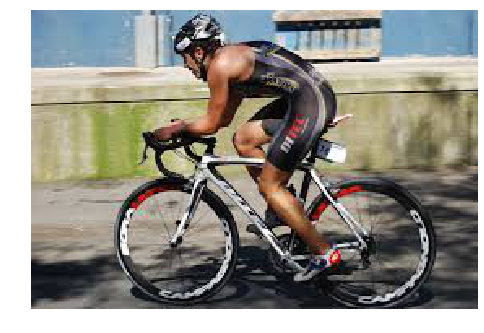

In [73]:
img = load_img('ciclista4.jpeg')
plt.imshow(img)
plt.axis('off')

In [74]:
from pickle import load
from numpy import argmax
from keras.preprocessing.sequence import pad_sequences
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.inception_v3 import preprocess_input
from keras.models import Model
from keras.models import load_model
import PIL 

# extract features from each photo in the directory
def extract_features(filename):
	# load the model
	model = InceptionV3(weights='imagenet', include_top=False, pooling='avg')
	# load the photo
	image = load_img(filename, target_size=(299, 299))
	# convert the image pixels to a numpy array
	image = img_to_array(image)
	# reshape data for the model
	image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
	# prepare the image for the InceptionV3 model
	image = preprocess_input(image)
	# get features
	feature = model.predict(image, verbose=0)
	return feature

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# remove start/end sequence tokens from a summary
def cleanup_summary(summary):
	# remove start of sequence token
	index = summary.find('startseq ')
	if index > -1:
		summary = summary[len('startseq '):]
	# remove end of sequence token
	index = summary.find(' endseq')
	if index > -1:
		summary = summary[:index]
	return summary

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = 'startseq'
	# iterate over the whole length of the sequence
	for _ in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endseq':
			break
	return in_text

# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))
# pre-define the max sequence length (from training)
max_length = 34
# load the model
model = load_model('modelv3c.h5')
# load and prepare the photograph
photo = extract_features('ciclista4.jpeg')
# generate description
description = generate_desc(model, tokenizer, photo, 37)
description = cleanup_summary(description)
print(description)

a man in a red helmet is riding a bike on a dirt path


#CONCLUSION

La evolución de la práctica ha seguido los hitos esperados según la teoría. Se ha empezado con una red convolucional VGG para extraer features que se ha visto optimizada cuando se ha sustituido por la InceptionV3. A partir de este momento para aumentar el accuracy del modelo se ha aplicado un aumento del número de neuronas que se ha visto reflejado en un mayor accuracy pero también en un incremento del overfitting que no permite la generalización. Para hacer frente a este problema se han introducido capas de normalización y de dropout, además de adaptar el optimizer para obtener el mejor equilibrio posible entre accuracy y overfitting.
Sin embargo, se considera que los resultados podrían haber sido mejores principalmente si se hubiera aumentado los datos del dataset. También la implementación de un método automático como hyperopt hubiera permitido conocer los hiperparámetros que mejor funcionarían en vez de ir probando. Y por último, se considera que una disminución del vocabulario también habría mejorado los resultados. Pero el mayor problema que se ha encontrado para realizar la práctica ha sido que la herramienta Google Collab no es nada estable y no se ha perdido mucho tiempo repitiendo pruebas que ya estaban realizadas, además de sufrir cortes, etc. y de tener una limitación que no ha permitido realizar todas las pruebas que hubieran llevado a una conclusión mucho más exhaustiva.

#Anexos

#Guardar archivos en drive

#Download files to local

In [41]:
!ls

CrowdFlowerAnnotations.txt  Flickr8k_Dataset.zip       model4.h5
datalab			    Flickr_8k.devImages.txt    model.png
descriptions.txt	    Flickr8k.lemma.token.txt   modelv3b.h5
example.jpg		    Flickr_8k.testImages.txt   modelv3.h5
ExpertAnnotations.txt	    Flickr8k_text.zip	       prueba2.docx
features2.pkl		    Flickr8k.token.txt	       readme.txt
features.pkl		    Flickr_8k.trainImages.txt  tokenizer.pkl
Flicker8k_Dataset	    __MACOSX


In [11]:
from google.colab import files
files.download('modelv3.h5')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 43988, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 696, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

In [0]:
!pip install -U -q PyDrive

import tensorflow as tf
import timeit

config = tf.ConfigProto()
config.gpu_options.allow_growth = True

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [10]:
!ls

baseline1.csv		    features.pkl	      Flickr8k.token.txt
CrowdFlowerAnnotations.txt  Flicker8k_Dataset	      Flickr_8k.trainImages.txt
datalab			    Flickr8k_Dataset.zip      __MACOSX
descriptions.txt	    Flickr_8k.devImages.txt   model1.h5
ExpertAnnotations.txt	    Flickr8k.lemma.token.txt  model1.h5.zip
features2.pkl		    Flickr_8k.testImages.txt  readme.txt
features2.pkl.zip	    Flickr8k_text.zip


#Download

In [81]:
!ls

correr.jpg		    Flickr8k_Dataset.zip       gato.jpg
CrowdFlowerAnnotations.txt  Flickr8k_Dataset.zip.1     __MACOSX
datalab			    Flickr_8k.devImages.txt    model1.h5
descriptions.txt	    Flickr8k.lemma.token.txt   model1.h5.zip
example.jpg		    Flickr_8k.testImages.txt   model4.h5
ExpertAnnotations.txt	    Flickr8k_text.zip	       model.png
features (1).pkl	    Flickr8k_text.zip.1        readme.txt
features.pkl		    Flickr8k.token.txt	       tokenizer.pkl
Flicker8k_Dataset	    Flickr_8k.trainImages.txt


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)  

# get the folder id where you want to save your file
file = drive.CreateFile()
file.SetContentFile('modelv3e.h5')
file.Upload()  

In [70]:
from google.colab import files

uploaded = files.upload()

    

Saving perroygato.jpeg to perroygato.jpeg


#upload

In [0]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)





In [16]:
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: features2.pkl, id: 1SluXk3vsDHziRQFwiUfBaZ4mMItn_jCs
title: features.pkl, id: 1_-ynzR6pNKiQQG_3RZdOwolVrZ3lNNXp
title: modelv3e.h5, id: 1p6ugPAvubUIsOUNtvfEk9Oe9smEiGLJX
title: modelv3d.h5, id: 1NtdRsw4u7kaVr8xztiBTRCrqY90TehyF
title: modelv3c.h5, id: 1OHFM2H3EmGByyvB7SP89_ibA-9zEA4Lw
title: modelv3b.h5, id: 19KOxfKQemOcYhimyEXcC4N_J_bXQYwwr
title: modelv3.h5, id: 1vLKGAOvRgDoyHkM4aawrLzGYSnr59Ipx
title: folder_id, id: 1-jWp70cvfrS9o40zOoYE5PCVz0R5bCkG
title: colab, id: 1hMtJsn3gcTZQ4zshq_fG8e7ejNOybENL
title: Colab Notebooks, id: 1Q6ui_8vea83CgCvIiXz54rF6cZSNM15d
title: PracticaFinal.zip, id: 1A-nczWv-4X2sJaCYmk02BF5Mp7nhKqvI


In [0]:
train_downloaded = drive.CreateFile({'id': '1OHFM2H3EmGByyvB7SP89_ibA-9zEA4Lw'})
train_downloaded.GetContentFile('modelv3c.h5')

In [23]:
!ls

CrowdFlowerAnnotations.txt  Flickr8k_Dataset.zip       __MACOSX
datalab			    Flickr_8k.devImages.txt    modelv3c.h5
descriptions.txt	    Flickr8k.lemma.token.txt   modelv3d.h5
ExpertAnnotations.txt	    Flickr_8k.testImages.txt   modelv3e.h5
features2.pkl		    Flickr8k_text.zip	       readme.txt
features.pkl		    Flickr8k.token.txt
Flicker8k_Dataset	    Flickr_8k.trainImages.txt
